In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [2]:
diamonds = pd.read_csv('Input/diamonds.csv')

In [3]:
predict = pd.read_csv('Input/predict.csv')
sample_submission = pd.read_csv('Input/sample_submission.csv')
train = pd.read_csv('Input/train.csv')

In [4]:
train.dtypes

id           int64
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

In [93]:
train.describe()

,id,carat,depth,table,x,y,z,price,cut_le,color_le,clarity_le
count,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000
mean,20227.000000,0.798121,61.745132,57.451892,5.731217,5.735248,3.538685,3938.101125,2.552688,2.594067,3.833642
std,11678.496907,0.474880,1.434259,2.225893,1.123364,1.152859,0.710579,3992.645108,1.025211,1.699853,1.726293
min,0.000000,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000,326.000000,0.000000,0.000000,0.000000
25%,10113.500000,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000,948.000000,2.000000,1.000000,2.000000
50%,20227.000000,0.700000,61.800000,57.000000,5.700000,5.710000,3.520000,2401.000000,2.000000,3.000000,4.000000
75%,30340.500000,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000,5333.000000,3.000000,4.000000,5.000000
max,40454.000000,5.010000,79.000000,79.000000,10.740000,58.900000,31.800000,18818.000000,4.000000,6.000000,7.000000


In [95]:
train.corr()

,id,carat,depth,table,x,y,z,price,cut_le,color_le,clarity_le
id,1.000000,-0.000378,-0.002242,0.009870,-0.000055,-0.001637,-0.001152,0.000117,0.008701,-0.009127,0.003511
carat,-0.000378,1.000000,0.028899,0.178948,0.974698,0.944318,0.947809,0.920994,0.018654,0.290270,-0.215731
depth,-0.002242,0.028899,1.000000,-0.298248,-0.025145,-0.029319,0.094562,-0.009756,-0.194890,0.045644,-0.052483
table,0.009870,0.178948,-0.298248,1.000000,0.193161,0.179688,0.146999,0.125868,0.156817,0.024696,-0.084450
x,-0.000055,0.974698,-0.025145,0.193161,1.000000,0.967194,0.965231,0.884080,0.023197,0.268739,-0.227692
y,-0.001637,0.944318,-0.029319,0.179688,0.967194,1.000000,0.940881,0.858680,0.028172,0.259930,-0.218013
z,-0.001152,0.947809,0.094562,0.146999,0.965231,0.940881,1.000000,0.856299,0.002761,0.264584,-0.224615
price,0.000117,0.920994,-0.009756,0.125868,0.884080,0.858680,0.856299,1.000000,0.043197,0.170355,-0.071126
cut_le,0.008701,0.018654,-0.194890,0.156817,0.023197,0.028172,0.002761,0.043197,1.000000,-0.003245,0.030233
color_le,-0.009127,0.290270,0.045644,0.024696,0.268739,0.259930,0.264584,0.170355,-0.003245,1.000000,-0.030241


In [6]:
print(train.shape)

(40455, 11)


In [7]:
display(train.sort_values(by=['price'], ascending = False).head())

train.sort_values(by=['price'], ascending = True).head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
14955,14955,2.00,Very Good,G,SI1,63.5,56.0,7.90,7.97,5.04,18818
25017,25017,2.07,Ideal,G,SI2,62.5,55.0,8.20,8.13,5.11,18804
14089,14089,2.00,Very Good,H,SI1,62.8,57.0,7.95,8.00,5.01,18803
18387,18387,2.29,Premium,I,SI1,61.8,59.0,8.52,8.45,5.24,18797
5933,5933,2.04,Premium,H,SI1,58.1,60.0,8.37,8.28,4.84,18795


,id,carat,cut,color,clarity,depth,table,x,y,z,price
35732,35732,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
19880,19880,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
26013,26013,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327
7873,7873,0.24,Very Good,J,VVS2,62.8,57.0,3.94,3.96,2.48,336
2003,2003,0.24,Very Good,I,VVS1,62.3,57.0,3.95,3.98,2.47,336


In [8]:
train.clarity.value_counts()

SI1     9806
VS2     9204
SI2     6865
VS1     6099
VVS2    3778
VVS1    2776
IF      1365
I1       562
Name: clarity, dtype: int64

In [9]:
train.cut.value_counts()

Ideal        16250
Premium      10342
Very Good     9026
Good          3639
Fair          1198
Name: cut, dtype: int64

In [10]:
train.color.value_counts()

G    8565
E    7344
F    7162
H    6147
D    5063
I    4052
J    2122
Name: color, dtype: int64

In [11]:
train.isna().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [12]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
train["cut_le"] = le.fit_transform(train["cut"])
train["color_le"] = le.fit_transform(train["color"])
train["clarity_le"] = le.fit_transform(train["clarity"])

<AxesSubplot:>

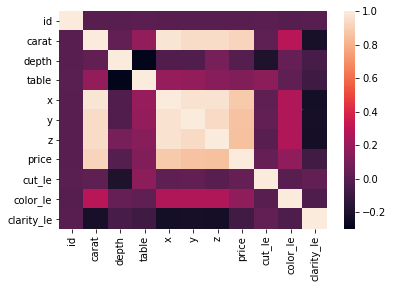

In [14]:
sns.heatmap(train.corr())

In [15]:
train.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price,cut_le,color_le,clarity_le
0,0,1.12,Premium,H,SI1,61.6,59.0,6.67,6.63,4.10,5363,3,4,2
1,1,1.14,Very Good,E,SI2,60.0,54.0,6.74,6.97,4.11,5593,4,1,3
2,2,0.90,Very Good,D,SI2,60.3,63.0,6.12,6.22,3.72,3534,4,0,3
3,3,0.71,Ideal,E,VS1,61.9,54.0,5.74,5.76,3.56,3212,2,1,4
4,4,0.34,Very Good,F,SI2,60.0,62.0,4.51,4.55,2.72,447,4,2,3


In [16]:
clean_1 = train[['carat', 'cut_le', 'color_le', 'clarity_le','price']]

In [17]:
X = clean_1.copy()
X.drop('price', axis=1, inplace = True)


In [18]:
y = clean_1['price']

In [19]:
from sklearn.preprocessing import StandardScaler, Normalizer


In [20]:
from sklearn.linear_model import OrthogonalMatchingPursuit, LinearRegression
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor

In [21]:
clf = linear_model.ARDRegression()
classo = linear_model.Lasso(alpha=0.1)

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)


In [86]:
models = {
    "OrthogonalMatchingPursuit" : OrthogonalMatchingPursuit(),
    "LinearRegression" : LinearRegression(),
    "KNeighborsRegressor": KNeighborsRegressor(),
    "ARDRegression" : linear_model.ARDRegression(),
    "Lasso" : linear_model.Lasso(alpha=0.1)
}

In [87]:
for name, model in models.items():
    print(f"Entrenando {name}")
    model.fit(X_train, y_train)
    print("He acabado :) ")

Entrenando OrthogonalMatchingPursuit
He acabado :) 
Entrenando LinearRegression
He acabado :) 
Entrenando KNeighborsRegressor
He acabado :) 
Entrenando ARDRegression
He acabado :) 
Entrenando Lasso
He acabado :) 


In [96]:
from sklearn.metrics import mean_squared_error
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"-------{name}-------")
    print (mean_squared_error(y_test, y_pred))

-------OrthogonalMatchingPursuit-------
2458743.3084271676
-------LinearRegression-------
1988161.4821302607
-------KNeighborsRegressor-------
643033.2833914226
-------ARDRegression-------
1988119.0218115957
-------Lasso-------
1988175.5621371595


In [119]:
X = clean_1.copy()
X.drop('price', axis=1, inplace = True)
y = clean_1['price']
Normalizer(X)
StandardScaler(X)

StandardScaler(copy=       carat  cut_le  color_le  clarity_le
0       1.12       3         4           2
1       1.14       4         1           3
2       0.90       4         0           3
3       0.71       2         1           4
4       0.34       4         2           3
...      ...     ...       ...         ...
40450   0.90       1         0           2
40451   0.35       2         0           6
40452   0.90       1         3           3
40453   1.21       1         4           2
40454   0.41       2         4           6

[40455 rows x 4 columns])

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)


In [120]:
for name, model in models.items():
    print(f"Entrenando {name}")
    model.fit(X_train, y_train)
    print("He acabado :) ")

Entrenando OrthogonalMatchingPursuit
He acabado :) 
Entrenando LinearRegression
He acabado :) 
Entrenando KNeighborsRegressor
He acabado :) 
Entrenando ARDRegression
He acabado :) 
Entrenando Lasso
He acabado :) 


In [121]:
from sklearn.metrics import mean_squared_error
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"-------{name}-------")
    print (mean_squared_error(y_test, y_pred))

-------OrthogonalMatchingPursuit-------
2397408.700614246
-------LinearRegression-------
1936734.7216788803
-------KNeighborsRegressor-------
533901.2599431468
-------ARDRegression-------
1936747.839341895
-------Lasso-------
1936754.8240442118


In [125]:
clean_2 = train.copy()
clean_2.drop(['cut','color','clarity','x','y','z'], axis = 1, inplace = True)

X = clean_2.copy()
X.drop(['price'], axis = 1, inplace = True)
y = clean_2['price']

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [127]:
for name, model in models.items():
    print(f"Entrenando {name}")
    model.fit(X_train, y_train)
    print("He acabado :) ")

Entrenando OrthogonalMatchingPursuit
He acabado :) 
Entrenando LinearRegression
He acabado :) 
Entrenando KNeighborsRegressor
He acabado :) 
Entrenando ARDRegression
He acabado :) 
Entrenando Lasso
He acabado :) 


In [128]:
from sklearn.metrics import mean_squared_error
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"-------{name}-------")
    print (mean_squared_error(y_test, y_pred))

-------OrthogonalMatchingPursuit-------
2493673.9269188154
-------LinearRegression-------
1979104.6919450269
-------KNeighborsRegressor-------
18664020.35033
-------ARDRegression-------
1978924.007630809
-------Lasso-------
1979108.3590746694


In [130]:
clean_2 = train.copy()
clean_2.drop(['cut','color','clarity','x','y','z'], axis = 1, inplace = True)

X = clean_2.copy()
X.drop(['price'], axis = 1, inplace = True)
y = clean_2['price']
Normalizer(X)
StandardScaler(X)

StandardScaler(copy=          id  carat  depth  table  cut_le  color_le  clarity_le
0          0   1.12   61.6   59.0       3         4           2
1          1   1.14   60.0   54.0       4         1           3
2          2   0.90   60.3   63.0       4         0           3
3          3   0.71   61.9   54.0       2         1           4
4          4   0.34   60.0   62.0       4         2           3
...      ...    ...    ...    ...     ...       ...         ...
40450  40450   0.90   63.8   58.0       1         0           2
40451  40451   0.35   62.0   54.0       2         0           6
40452  40452   0.90   58.4   55.0       1         3           3
40453  40453   1.21   63.6   56.0       1         4           2
40454  40454   0.41   61.4   56.0       2         4           6

[40455 rows x 7 columns])

In [131]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [132]:
for name, model in models.items():
    print(f"Entrenando {name}")
    model.fit(X_train, y_train)
    print("He acabado :) ")

Entrenando OrthogonalMatchingPursuit
He acabado :) 
Entrenando LinearRegression
He acabado :) 
Entrenando KNeighborsRegressor
He acabado :) 
Entrenando ARDRegression
He acabado :) 
Entrenando Lasso
He acabado :) 


In [133]:
from sklearn.metrics import mean_squared_error
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"-------{name}-------")
    print (mean_squared_error(y_test, y_pred))

-------OrthogonalMatchingPursuit-------
2388244.4726966354
-------LinearRegression-------
1899768.3128871757
-------KNeighborsRegressor-------
17814505.91108145
-------ARDRegression-------
1899687.7414680766
-------Lasso-------
1899730.745422935


In [139]:
clean_2 = train.copy()
clean_2.drop(['cut','color','clarity','depth','table'], axis = 1, inplace = True)

X = clean_2.copy()
X.drop(['price'], axis = 1, inplace = True)
y = clean_2['price']

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [141]:
for name, model in models.items():
    print(f"Entrenando {name}")
    model.fit(X_train, y_train)
    print("He acabado :) ")

Entrenando OrthogonalMatchingPursuit
He acabado :) 
Entrenando LinearRegression
He acabado :) 
Entrenando KNeighborsRegressor
He acabado :) 
Entrenando ARDRegression
He acabado :) 
Entrenando Lasso
He acabado :) 


In [142]:
from sklearn.metrics import mean_squared_error
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"-------{name}-------")
    print (mean_squared_error(y_test, y_pred))

-------OrthogonalMatchingPursuit-------
2552631.8675018856
-------LinearRegression-------
2036650.3723454357
-------KNeighborsRegressor-------
13683001.11164504
-------ARDRegression-------
2036774.0091920658
-------Lasso-------
2036518.3267375992


In [144]:
clean_2 = train.copy()
clean_2.drop(['cut','color','clarity','depth','table'], axis = 1, inplace = True)

X = clean_2.copy()
X.drop(['price'], axis = 1, inplace = True)
y = clean_2['price']
Normalizer(X)
StandardScaler(X)

StandardScaler(copy=          id  carat     x     y     z  cut_le  color_le  clarity_le
0          0   1.12  6.67  6.63  4.10       3         4           2
1          1   1.14  6.74  6.97  4.11       4         1           3
2          2   0.90  6.12  6.22  3.72       4         0           3
3          3   0.71  5.74  5.76  3.56       2         1           4
4          4   0.34  4.51  4.55  2.72       4         2           3
...      ...    ...   ...   ...   ...     ...       ...         ...
40450  40450   0.90  6.13  6.09  3.90       1         0           2
40451  40451   0.35  4.56  4.57  2.83       2         0           6
40452  40452   0.90  6.34  6.39  3.72       1         3           3
40453  40453   1.21  6.63  6.68  4.23       1         4           2
40454  40454   0.41  4.80  4.77  2.94       2         4           6

[40455 rows x 8 columns])

In [145]:
for name, model in models.items():
    print(f"Entrenando {name}")
    model.fit(X_train, y_train)
    print("He acabado :) ")

Entrenando OrthogonalMatchingPursuit
He acabado :) 
Entrenando LinearRegression
He acabado :) 
Entrenando KNeighborsRegressor
He acabado :) 
Entrenando ARDRegression
He acabado :) 
Entrenando Lasso
He acabado :) 


In [146]:
from sklearn.metrics import mean_squared_error
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"-------{name}-------")
    print (mean_squared_error(y_test, y_pred))

-------OrthogonalMatchingPursuit-------
2552631.8675018856
-------LinearRegression-------
2036650.3723454357
-------KNeighborsRegressor-------
13683001.11164504
-------ARDRegression-------
2036774.0091920658
-------Lasso-------
2036518.3267375992


In [386]:
X = clean_1.copy()
X.drop('price', axis=1, inplace = True)
y = clean_1['price']
Normalizer(X)


Normalizer(norm=       carat  cut_le  color_le  clarity_le
0       1.12       3         4           2
1       1.14       4         1           3
2       0.90       4         0           3
3       0.71       2         1           4
4       0.34       4         2           3
...      ...     ...       ...         ...
40450   0.90       1         0           2
40451   0.35       2         0           6
40452   0.90       1         3           3
40453   1.21       1         4           2
40454   0.41       2         4           6

[40455 rows x 4 columns])

In [23]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import RadiusNeighborsRegressor
from sklearn.svm import LinearSVR
from sklearn import svm
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn import svm
models3 = {
    "DecisionTreeRegressor" : DecisionTreeRegressor(),
    "GradientBoostingRegressor" : GradientBoostingRegressor(),
    "KNeighborsRegressor": KNeighborsRegressor(),
    "LinearSVR" : LinearSVR(),
    "OrthogonalMatchingPursuit" : OrthogonalMatchingPursuit(),
    "LinearRegression" : LinearRegression(),
    "RandomForestRegressor" : RandomForestRegressor(),
    "ARDRegression" : linear_model.ARDRegression(),
    "Lasso" : linear_model.Lasso(alpha=0.1),
    "PassiveAggressiveRegressor" : PassiveAggressiveRegressor()
}

In [383]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [384]:
for name, model in models2.items():
    print(f"Entrenando {name}")
    model.fit(X_train, y_train)
    print("He acabado :) ")

Entrenando DecisionTreeRegressor
He acabado :) 
Entrenando RadiusNeighborsRegressor
He acabado :) 
Entrenando KNeighborsRegressor
He acabado :) 
Entrenando LinearSVR
He acabado :) 


In [385]:
from sklearn.metrics import mean_squared_error
for name, model in models2.items():
    y_pred = model.predict(X_test)
    print(f"-------{name}-------")
    print (mean_squared_error(y_test, y_pred))

-------DecisionTreeRegressor-------
488617.5082880432
-------RadiusNeighborsRegressor-------
3.154267398228951e+34
-------KNeighborsRegressor-------
542448.8253565691
-------LinearSVR-------
4273138.360418574


In [270]:
X = clean_1.copy()
X.drop('price', axis=1, inplace = True)
y = clean_1['price']
StandardScaler(X)

StandardScaler(copy=       carat  cut_le  color_le  clarity_le
0       1.12       3         4           2
1       1.14       4         1           3
2       0.90       4         0           3
3       0.71       2         1           4
4       0.34       4         2           3
...      ...     ...       ...         ...
40450   0.90       1         0           2
40451   0.35       2         0           6
40452   0.90       1         3           3
40453   1.21       1         4           2
40454   0.41       2         4           6

[40455 rows x 4 columns])

In [271]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [272]:
for name, model in models2.items():
    print(f"Entrenando {name}")
    model.fit(X_train, y_train)
    print("He acabado :) ")

Entrenando DecisionTreeRegressor
He acabado :) 
Entrenando RadiusNeighborsRegressor
He acabado :) 
Entrenando KNeighborsRegressor
He acabado :) 
Entrenando LinearSVR
He acabado :) 


In [273]:
from sklearn.metrics import mean_squared_error
for name, model in models2.items():
    y_pred = model.predict(X_test)
    print(f"-------{name}-------")
    print (mean_squared_error(y_test, y_pred))

-------DecisionTreeRegressor-------
483171.65564842493
-------RadiusNeighborsRegressor-------
4.205689864305266e+34
-------KNeighborsRegressor-------
538061.3033296255
-------LinearSVR-------
4154456.821581813


In [32]:
import numpy as np
from sklearn.model_selection import cross_val_score


In [294]:
values = []

for name, model in models2.items():
    scores = cross_val_score(model,X,y, cv=10, scoring='neg_mean_squared_error')

    print(f"{name} mean{np.mean(scores)}")
    values.append(np.mean(scores))
print('max',max(values))

DecisionTreeRegressor mean-454496.2176408832
RadiusNeighborsRegressor mean-3.364551942839448e+34
KNeighborsRegressor mean-534528.8605120395
LinearSVR mean-3925755.367885058
min -3.364551942839448e+34


In [295]:
from sklearn.metrics import mean_squared_error
for name, model in models2.items():
    y_pred = model.predict(X_test)
    print(f"-------{name}-------")
    print (mean_squared_error(y_test, y_pred))

-------DecisionTreeRegressor-------
180288.09001781067
-------RadiusNeighborsRegressor-------
1.051422466076318e+34
-------KNeighborsRegressor-------
370427.56384130515
-------LinearSVR-------
3962898.77522427


In [296]:
X = clean_1.copy()
X.drop('price', axis=1, inplace = True)
y = clean_1['price']
StandardScaler(X)

StandardScaler(copy=       carat  cut_le  color_le  clarity_le
0       1.12       3         4           2
1       1.14       4         1           3
2       0.90       4         0           3
3       0.71       2         1           4
4       0.34       4         2           3
...      ...     ...       ...         ...
40450   0.90       1         0           2
40451   0.35       2         0           6
40452   0.90       1         3           3
40453   1.21       1         4           2
40454   0.41       2         4           6

[40455 rows x 4 columns])

In [297]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [298]:
model = KNeighborsRegressor()

In [299]:
model.fit(X_train,y_train)

KNeighborsRegressor()

In [300]:
y_pred = model.predict(X_test)


In [301]:
print (mean_squared_error(y_test, y_pred))

649848.7168953157


In [302]:
result = pd.DataFrame({
    "y_pred":y_pred,
    "gt":y_test
})
result

,y_pred,gt
33660,4021.0,4395
8895,6012.4,5925
14052,918.0,1002
3090,697.4,765
17504,13630.8,13945
...,...,...
10755,5472.2,5374
19144,911.8,1015
34019,2333.2,2232
2767,5710.6,5634


In [374]:
X = clean_1.copy()
X.drop('price', axis=1, inplace = True)
y = clean_1['price']
Normalizer(X)



Normalizer(norm=       carat  cut_le  color_le  clarity_le
0       1.12       3         4           2
1       1.14       4         1           3
2       0.90       4         0           3
3       0.71       2         1           4
4       0.34       4         2           3
...      ...     ...       ...         ...
40450   0.90       1         0           2
40451   0.35       2         0           6
40452   0.90       1         3           3
40453   1.21       1         4           2
40454   0.41       2         4           6

[40455 rows x 4 columns])

In [375]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [376]:
model = DecisionTreeRegressor()

In [377]:
model.fit(X_train,y_train)

DecisionTreeRegressor()

In [378]:
y_pred = model.predict(X_test)


In [379]:
print (mean_squared_error(y_test, y_pred))

465906.7576168313


In [380]:
result = pd.DataFrame({
    "y_pred":y_pred,
    "gt":y_test
})
result

,y_pred,gt
9515,5593.000000,4469
32631,5601.000000,3105
28035,10211.000000,8972
5667,1961.500000,2441
12686,2424.333333,2272
...,...,...
14942,14308.000000,18477
15472,640.000000,530
40349,14557.750000,12617
37440,3872.000000,3599


In [403]:
X = clean_1.copy()
X.drop('price', axis=1, inplace = True)
y = clean_1['price']

for name, model in models3.items():
    print(f"Entrenando {name}")
    model.fit(X_train, y_train)
    print("He acabado :) ")
    
vale = []
from sklearn.metrics import mean_squared_error
for name, model in models3.items():
    y_pred = model.predict(X_test)
    print(f"-------{name}-------")
    print (mean_squared_error(y_test, y_pred))
    vale.append(mean_squared_error(y_test, y_pred))
print(min(vale))

In [24]:
#nada

X = clean_1.copy()
X.drop('price', axis=1, inplace = True)
y = clean_1['price']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

for name, model in models3.items():
    print(f"Entrenando {name}")
    model.fit(X_train, y_train)
    print("He acabado :) ")
vale = []
from sklearn.metrics import mean_squared_error
for name, model in models3.items():
    y_pred = model.predict(X_test)
    print(f"-------{name}-------")
    print (mean_squared_error(y_test, y_pred))
    vale.append(mean_squared_error(y_test, y_pred))
print(min(vale))

Entrenando DecisionTreeRegressor
He acabado :) 
Entrenando GradientBoostingRegressor
He acabado :) 
Entrenando KNeighborsRegressor
He acabado :) 
Entrenando LinearSVR
He acabado :) 
Entrenando OrthogonalMatchingPursuit
He acabado :) 
Entrenando LinearRegression
He acabado :) 
Entrenando RandomForestRegressor
He acabado :) 
Entrenando ARDRegression
He acabado :) 
Entrenando Lasso
He acabado :) 
Entrenando PassiveAggressiveRegressor
He acabado :) 
-------DecisionTreeRegressor-------
448137.5961656199
-------GradientBoostingRegressor-------
493397.1685295073
-------KNeighborsRegressor-------
524477.9390631566
-------LinearSVR-------
4177349.813158208
-------OrthogonalMatchingPursuit-------
2456674.2054031286
-------LinearRegression-------
2023035.658359195
-------RandomForestRegressor-------
362671.08995521604
-------ARDRegression-------
2023031.9480256536
-------Lasso-------
2023023.835708668
-------PassiveAggressiveRegressor-------
2290258.6905451627
362671.08995521604


In [25]:
#normal
X = clean_1.copy()
X.drop('price', axis=1, inplace = True)
y = clean_1['price']
Normalizer(X)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)
for name, model in models3.items():
    print(f"Entrenando {name}")
    model.fit(X_train, y_train)
    print("He acabado :) ")
    
vale = []
from sklearn.metrics import mean_squared_error
for name, model in models3.items():
    y_pred = model.predict(X_test)
    print(f"-------{name}-------")
    print (mean_squared_error(y_test, y_pred))
    vale.append(mean_squared_error(y_test, y_pred))
print(min(vale))

Entrenando DecisionTreeRegressor
He acabado :) 
Entrenando GradientBoostingRegressor
He acabado :) 
Entrenando KNeighborsRegressor
He acabado :) 
Entrenando LinearSVR
He acabado :) 
Entrenando OrthogonalMatchingPursuit
He acabado :) 
Entrenando LinearRegression
He acabado :) 
Entrenando RandomForestRegressor
He acabado :) 
Entrenando ARDRegression
He acabado :) 
Entrenando Lasso
He acabado :) 
Entrenando PassiveAggressiveRegressor
He acabado :) 
-------DecisionTreeRegressor-------
469801.8215508621
-------GradientBoostingRegressor-------
466064.1857373152
-------KNeighborsRegressor-------
549452.1677172167
-------LinearSVR-------
4098183.218555024
-------OrthogonalMatchingPursuit-------
2409996.1547129946
-------LinearRegression-------
1972950.4075065863
-------RandomForestRegressor-------
367639.0977714682
-------ARDRegression-------
1972910.0775184967
-------Lasso-------
1972955.2336319855
-------PassiveAggressiveRegressor-------
2212450.6454062853
367639.0977714682


In [26]:
#standar

X = clean_1.copy()
X.drop('price', axis=1, inplace = True)
y = clean_1['price']

StandardScaler(X)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)
for name, model in models3.items():

    print(f"Entrenando {name}")
    model.fit(X_train, y_train)
    print("He acabado :) ")

    
vale = []
from sklearn.metrics import mean_squared_error
for name, model in models3.items():
    y_pred = model.predict(X_test)
    print(f"-------{name}-------")
    print (mean_squared_error(y_test, y_pred))
    vale.append(mean_squared_error(y_test, y_pred))
print(min(vale))

Entrenando DecisionTreeRegressor
He acabado :) 
Entrenando GradientBoostingRegressor
He acabado :) 
Entrenando KNeighborsRegressor
He acabado :) 
Entrenando LinearSVR
He acabado :) 
Entrenando OrthogonalMatchingPursuit
He acabado :) 
Entrenando LinearRegression
He acabado :) 
Entrenando RandomForestRegressor
He acabado :) 
Entrenando ARDRegression
He acabado :) 
Entrenando Lasso
He acabado :) 
Entrenando PassiveAggressiveRegressor
He acabado :) 
-------DecisionTreeRegressor-------
506170.43019538047
-------GradientBoostingRegressor-------
500125.33763314376
-------KNeighborsRegressor-------
526147.2624298603
-------LinearSVR-------
4259736.04242397
-------OrthogonalMatchingPursuit-------
2599175.7263752907
-------LinearRegression-------
2112474.549058864
-------RandomForestRegressor-------
379683.2505515915
-------ARDRegression-------
2112518.958767235
-------Lasso-------
2112461.1729883673
-------PassiveAggressiveRegressor-------
2358168.5932281213
379683.2505515915


In [27]:
#normal standar


X = clean_1.copy()
X.drop('price', axis=1, inplace = True)
y = clean_1['price']
Normalizer(X)
StandardScaler(X)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)
for name, model in models3.items():
   
    print(f"Entrenando {name}")
    model.fit(X_train, y_train)
    print("He acabado :) ")

    
vale = []
from sklearn.metrics import mean_squared_error
for name, model in models3.items():
    y_pred = model.predict(X_test)
    print(f"-------{name}-------")
    print (mean_squared_error(y_test, y_pred))
    vale.append(mean_squared_error(y_test, y_pred))
print(min(vale))

Entrenando DecisionTreeRegressor
He acabado :) 
Entrenando GradientBoostingRegressor
He acabado :) 
Entrenando KNeighborsRegressor
He acabado :) 
Entrenando LinearSVR
He acabado :) 
Entrenando OrthogonalMatchingPursuit
He acabado :) 
Entrenando LinearRegression
He acabado :) 
Entrenando RandomForestRegressor
He acabado :) 
Entrenando ARDRegression
He acabado :) 
Entrenando Lasso
He acabado :) 
Entrenando PassiveAggressiveRegressor
He acabado :) 
-------DecisionTreeRegressor-------
445822.3953237337
-------GradientBoostingRegressor-------
439211.76631805376
-------KNeighborsRegressor-------
549580.3771894698
-------LinearSVR-------
4015604.704369271
-------OrthogonalMatchingPursuit-------
2436120.920730947
-------LinearRegression-------
1973044.3345233132
-------RandomForestRegressor-------
348773.6752306472
-------ARDRegression-------
1973044.3632008012
-------Lasso-------
1973019.0857298954
-------PassiveAggressiveRegressor-------
2210075.8176911934
348773.6752306472


In [34]:
X = clean_1.copy()
X.drop('price', axis=1, inplace = True)
y = clean_1['price']
Normalizer(X)
StandardScaler(X)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)


In [36]:
values = []

for name, model in models3.items():
    scores = cross_val_score(model,X,y, cv=10, scoring='neg_mean_squared_error')

    print(f"{name} mean{np.mean(scores)}")
    values.append(np.mean(scores))
print('max',max(values))


DecisionTreeRegressor mean-450714.23777769215
GradientBoostingRegressor mean-465954.5921013841
KNeighborsRegressor mean-534528.8605120395
LinearSVR mean-3919669.4766498953
OrthogonalMatchingPursuit mean-2419798.8184122997
LinearRegression mean-1962477.287240189
RandomForestRegressor mean-359820.6651274275
ARDRegression mean-1962478.3935233317
Lasso mean-1962477.3320720072
PassiveAggressiveRegressor mean-2248057.834942655
max -359820.6651274275


In [96]:
X = clean_1.copy()
X.drop('price', axis=1, inplace = True)
y = clean_1['price']
Normalizer(X)
StandardScaler(X)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)
model = RandomForestRegressor()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print (mean_squared_error(y_test, y_pred))

print(r2_score(y_test,y_pred))

367617.9192321873
0.9767850554703726


In [111]:
from sklearn.metrics import r2_score
X = clean_1.copy()
X.drop('price', axis=1, inplace = True)
y = clean_1['price']
Normalizer(X)
StandardScaler(X)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)
model = RandomForestRegressor()
model.fit(X_train,y_train)
y_pred = model.predict(X_train)
print (mean_squared_error(y_train, y_pred))

print(r2_score(y_train,y_pred))

139490.38108254946
0.991202759364524


In [58]:
result = pd.DataFrame({
    "y_pred":y_pred,
    "gt":y_test
})
result

,y_pred,gt
5997,3209.666561,3352


In [59]:
scores = cross_val_score(model,X,y, cv=10, scoring='neg_mean_squared_error')
print(f"{name} mean{np.mean(scores)}")

PassiveAggressiveRegressor mean-360134.144008451


In [60]:
result = pd.DataFrame({
    "y_pred":y_pred,
    "gt":y_test
})
result

,y_pred,gt
5997,3209.666561,3352


In [61]:
y_pred = model.predict(X_test)

In [52]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
predict["cut_le"] = le.fit_transform(predict["cut"])
predict["color_le"] = le.fit_transform(predict["color"])
predict["clarity_le"] = le.fit_transform(predict["clarity"])

In [53]:
X


,carat,cut_le,color_le,clarity_le
0,1.12,3,4,2
1,1.14,4,1,3
2,0.90,4,0,3
3,0.71,2,1,4
4,0.34,4,2,3
...,...,...,...,...
40450,0.90,1,0,2
40451,0.35,2,0,6
40452,0.90,1,3,3
40453,1.21,1,4,2


In [55]:
prd = predict[['carat','cut_le','color_le','clarity_le']]

In [56]:
prd

,carat,cut_le,color_le,clarity_le
0,0.33,4,5,1
1,1.21,4,0,3
2,1.06,4,0,2
3,0.36,2,1,6
4,0.70,2,1,4
...,...,...,...,...
13480,2.04,1,0,2
13481,0.31,2,3,1
13482,0.52,2,0,7
13483,0.50,3,2,2


In [114]:
y_pred = model.predict(prd)

In [65]:
len(y_pred)

13485

In [64]:
sample_submission

,id,price
0,0,2452
1,1,13670
2,2,4875
3,3,12188
4,4,9229
...,...,...
13480,13480,7299
13481,13481,2968
13482,13482,14628
13483,13483,1260


In [79]:
result = pd.DataFrame({
    "price":y_pred,
})
result.reset_index(inplace=True)

In [81]:
result.rename(columns={'index': 'id'}, inplace=True)

In [83]:
result

,id,price
0,0,728.820119
1,1,6062.763917
2,2,5802.348500
3,3,1076.799285
4,4,3258.583884
...,...,...
13480,13480,16306.297056
13481,13481,892.857069
13482,13482,2497.639140
13483,13483,1318.501978


In [88]:
result.to_csv('result_1.csv', index = False)


In [103]:
from sklearn.ensemble import GradientBoostingRegressor

In [104]:
X = clean_1.copy()
X.drop('price', axis=1, inplace = True)
y = clean_1['price']
Normalizer(X)
StandardScaler(X)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)


GradientBoostingRegressor(random_state=0)

In [106]:
from sklearn.metrics import r2_score
X = clean_1.copy()
X.drop('price', axis=1, inplace = True)
y = clean_1['price']
Normalizer(X)
StandardScaler(X)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)
model = GradientBoostingRegressor(random_state=0)
model.fit(X_train,y_train)
y_pred = model.predict(X_train)
print (mean_squared_error(y_train, y_pred))

print(r2_score(y_train,y_pred))

438033.4532423264
0.9725488518641902
